<a href="https://colab.research.google.com/github/TastyButSadly/Notebooks/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

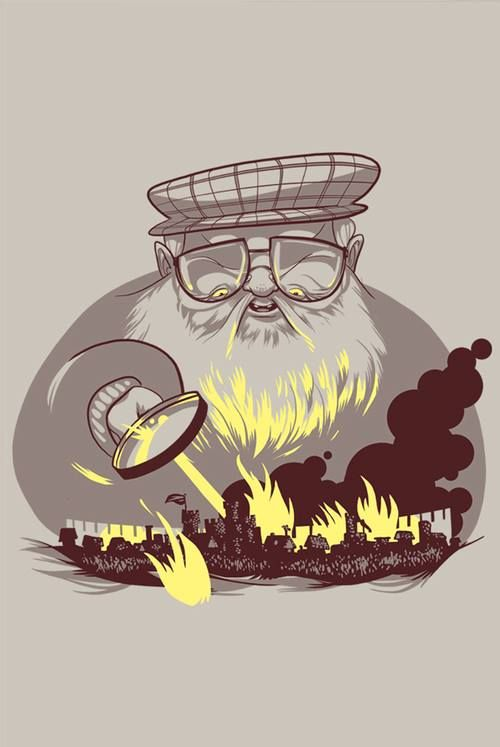

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 52.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 10.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
# data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data = pd.read_csv('/content/game_of_thrones_train.csv')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.shape

(1557, 26)

In [5]:
data.isna().sum()

,0
S.No,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381


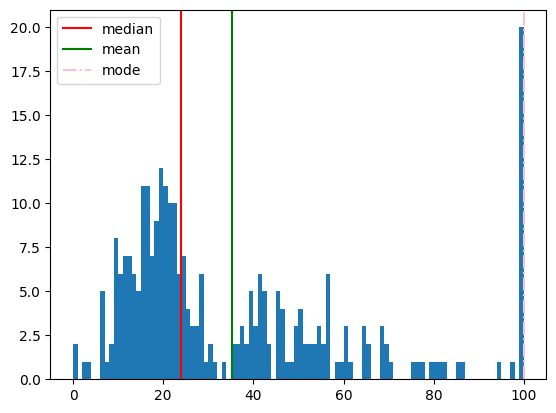

In [6]:
plt.hist(data.age, bins=100)
plt.axvline(data.age.median(), color='r', label='median')
plt.axvline(data.age.mean(), color='g', label='mean')
plt.axvline(data.age.mode()[0], color='pink', label='mode', linestyle='-.')
plt.legend()

In [7]:
data['age'].fillna(data['age'].median(), inplace=True)

<ipython-input-7-442d673f79cb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


In [8]:
data.loc[:, data.dtypes == 'float'] = data.loc[:, data.dtypes == 'float'].fillna(0)
data.loc[:, data.dtypes == 'object'] = data.loc[:, data.dtypes == 'object'].fillna('Unknown')

Пока заполнил числа нулями, строки - неизвестно
строкис живыми родственниками думаю всё равно дропнуть, так как они заполнены для пары десятков людей (только для них). Поэтому не буду делать новый признак ~"isAliveRelative". Имена героев и их родственников тоже не буду сохранять, так как будет много уникальных значений, которые \\
a) Раздуют таблицу при encoding \\
б) Не будут иметь влияния на целевую переменую \\

Также дата рождения и возраст - по сути один и тот же признак, оставлю возраст. \\
NaN в основном были в этих признаках, в принципе их можно было и не заполнять

float -> bool

In [9]:
float_cols = data.select_dtypes(include=['float', 'int']).columns

for col in float_cols:
    if data[col].isin([0, 1]).all():
        data[col] = data[col].astype(bool)

In [10]:
data.dtypes

,0
S.No,int64
name,object
title,object
male,bool
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [11]:
data['isPopular'] = data.popularity > 0.5
data['boolDeadRelations'] = data.numDeadRelations > 0
data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

In [12]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
def simplify_culture(culture):
    for key, values in cult.items():
        if culture in values:
            return key
    return culture

data['culture'] = data['culture'].apply(simplify_culture)
data.culture.unique()

array(['Unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'Westermen',
       'Westerman', 'Qarth', 'Lyseni', 'Qohor', 'Westeros', 'Norvoshi',
       'First Men', 'Meereenese', 'Andal', 'Astapori', 'ironborn',
       'Ghiscaricari', 'Braavos', 'Stormlands', 'Valemen', 'Myrish',
       'Lhazareen', 'Dornishmen', 'Sistermen', 'Northern mountain clans',
       'Andals', 'Vale', 'Crannogmen', 'Wildling', 'Dorne', 'Pentoshi',
       'Summer Islander', 'Westerlands', 'Summer Islands'], dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

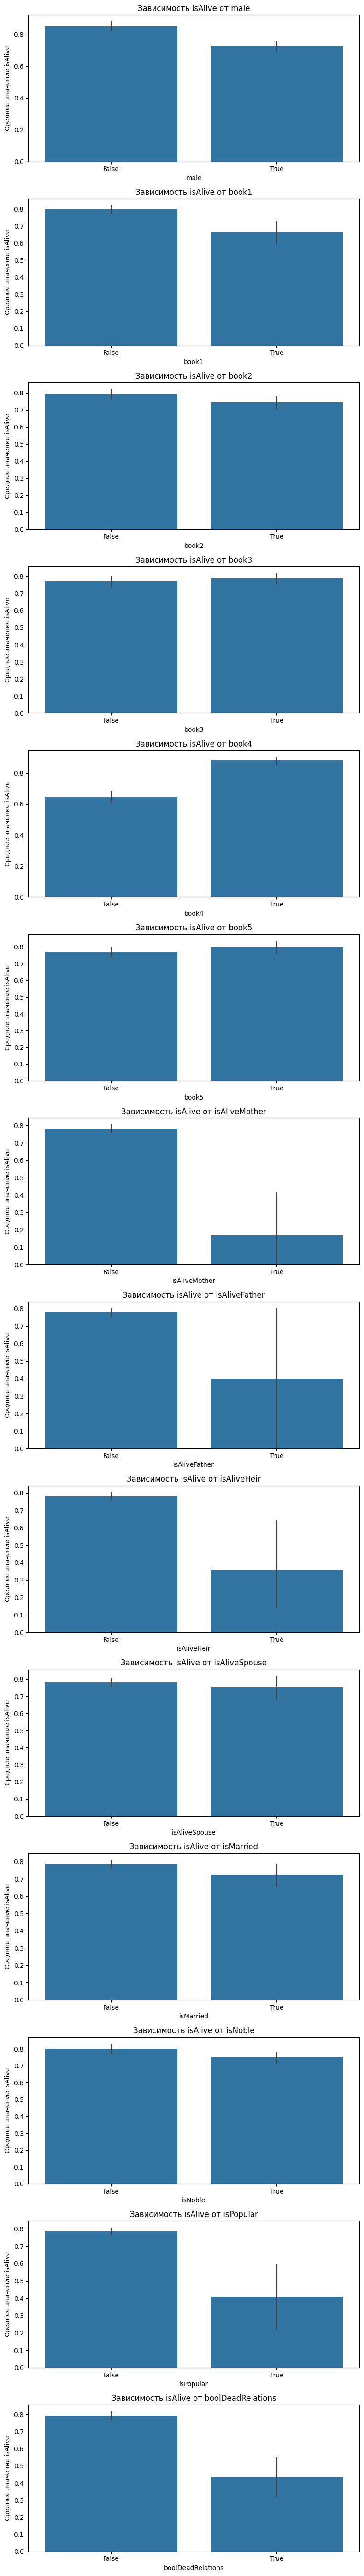

In [13]:
bool_features = data.drop(columns=['isAlive']).select_dtypes(include=['bool']).columns.tolist()

fig, axes = plt.subplots(nrows=len(bool_features), ncols=1, figsize=(8, len(bool_features) * 4))

for i, feature in enumerate(bool_features):
    ax = axes[i] if len(bool_features) > 1 else axes
    sns.barplot(x=data[feature], y=data['isAlive'], ax=ax)
    ax.set_title(f"Зависимость isAlive от {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Среднее значение isAlive")

plt.tight_layout()
plt.show()

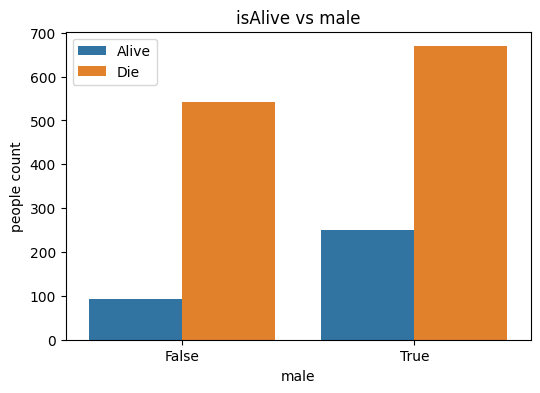

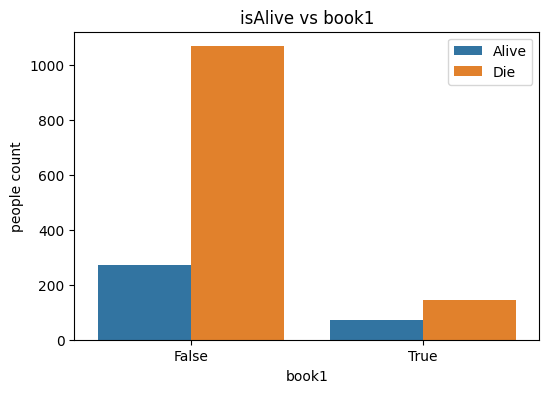

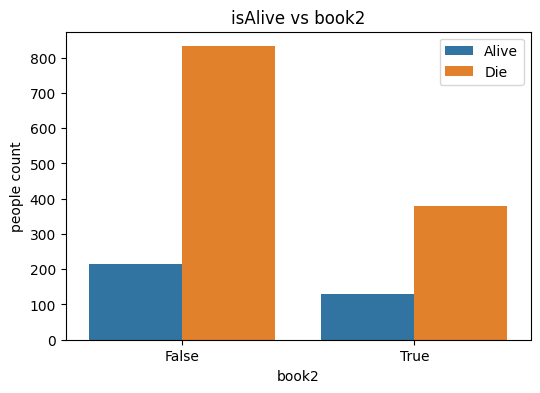

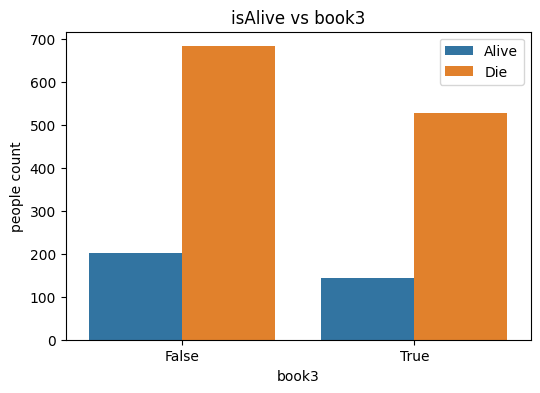

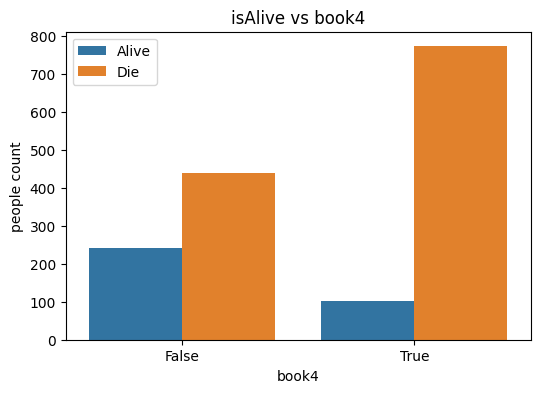

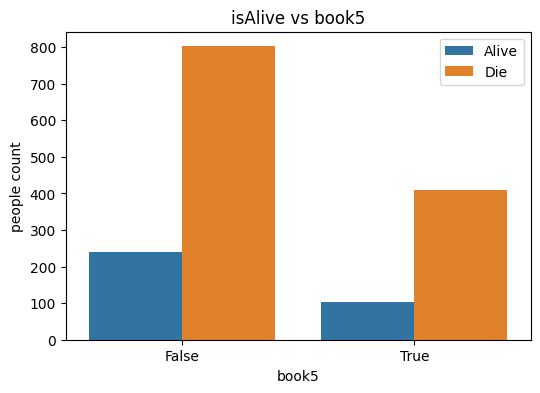

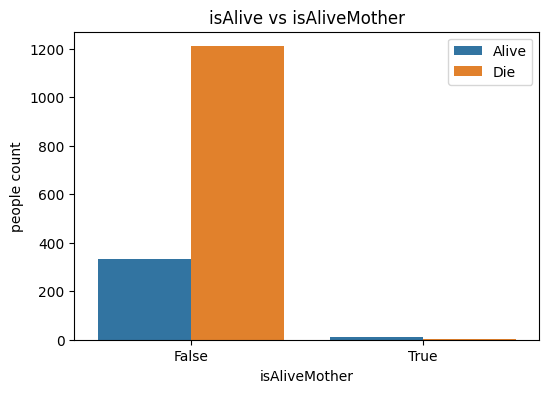

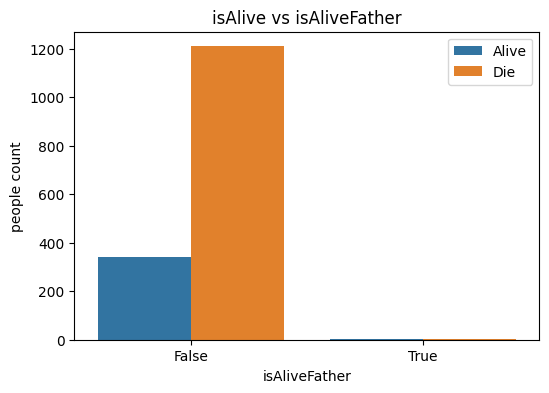

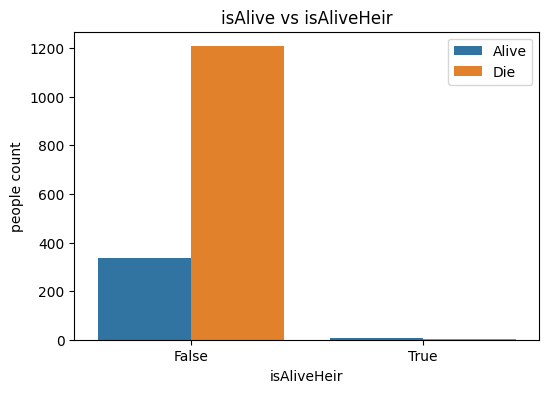

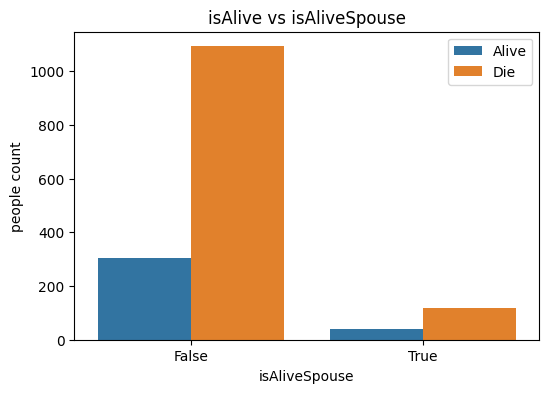

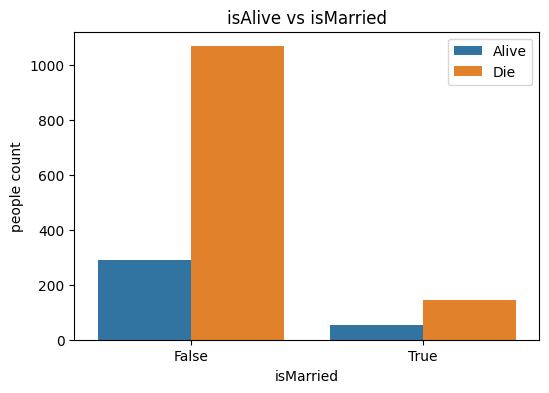

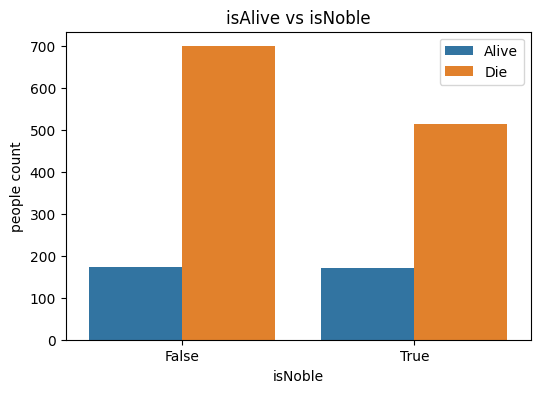

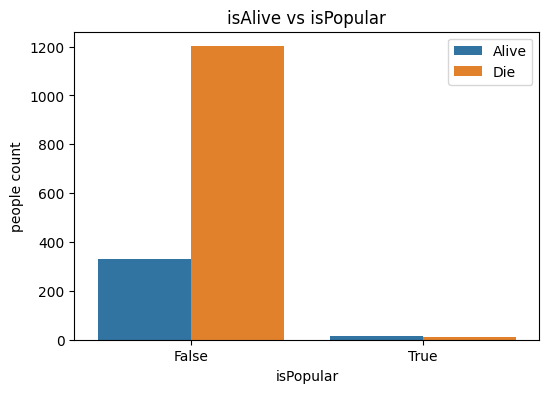

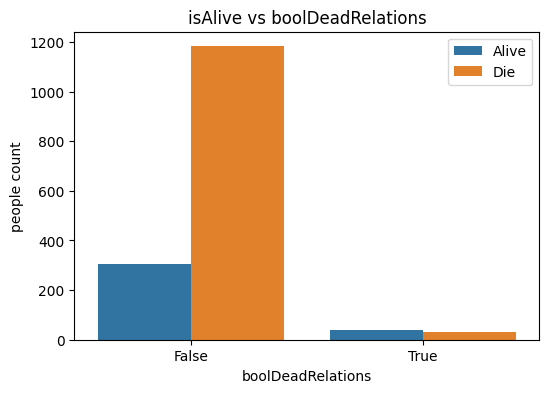

In [19]:
for feature in bool_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[feature], hue=data['isAlive'])
    plt.title(f"isAlive vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("people count")
    plt.legend(["Alive", "Die"])
    plt.show()


In [20]:
# data1 = data[data['isAliveMother'] == 0]['isAlive'].value_counts()
# data2 = data[data['isAliveMother'] == 1]['isAlive'].value_counts()

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))

# ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
# ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

# ax1.set_title("isAliveMother")
# ax2.set_title("not isAliveMother")

# plt.show()


In [14]:
data[data['isAliveMother'] == 1].isAliveMother.sum()

12

In [15]:
data[data['isAliveHeir'] == 1].isAliveMother.sum()

5

In [23]:
# data.drop(columns=['isAliveMother', 'isAliveSpouse', 'isAliveFather', 'isAliveHeir', 'name', 'mother','father', 'heir', 'spouse','dateOfBirth'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [16]:
data.isAlive.dtype

dtype('bool')

In [17]:
data.isAlive.value_counts()

,count
isAlive,
True,1212
False,345


<Axes: xlabel='isAlive', ylabel='count'>

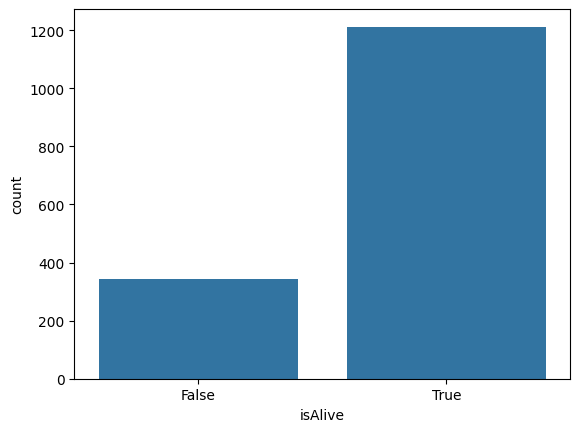

In [18]:
sns.countplot(x=data.isAlive)

>Целевая переменная имеет логический тип (точнее имела количественный, но я его сделал bool, так как она очевидно должна иметь его, человек не может быть на 0.123 быть живым. \\
Датасет несбалансирован. Ожидаем, что модел будет лучше предсказывать True. Пока что я не разбирался, как в таких случаях нужно действовать, вроде на семинаре не разбирали. Оставлю как есть.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [19]:
# data.heir.describe()

In [ ]:
# data.drop(columns=['mother','father', 'heir', 'spouse'], inplace=True)


In [26]:
!pip install category_encoders
from category_encoders import CatBoostEncoder


# categorical_cols = ['title', 'culture', 'house']
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns


encoder = CatBoostEncoder(cols=categorical_cols)

data[categorical_cols] = encoder.fit_transform(data[categorical_cols], data['isAlive'])

In [27]:
data.dtypes

,0
S.No,int64
name,float64
title,float64
male,float64
culture,float64
dateOfBirth,float64
mother,float64
father,float64
heir,float64
house,float64


<Axes: >

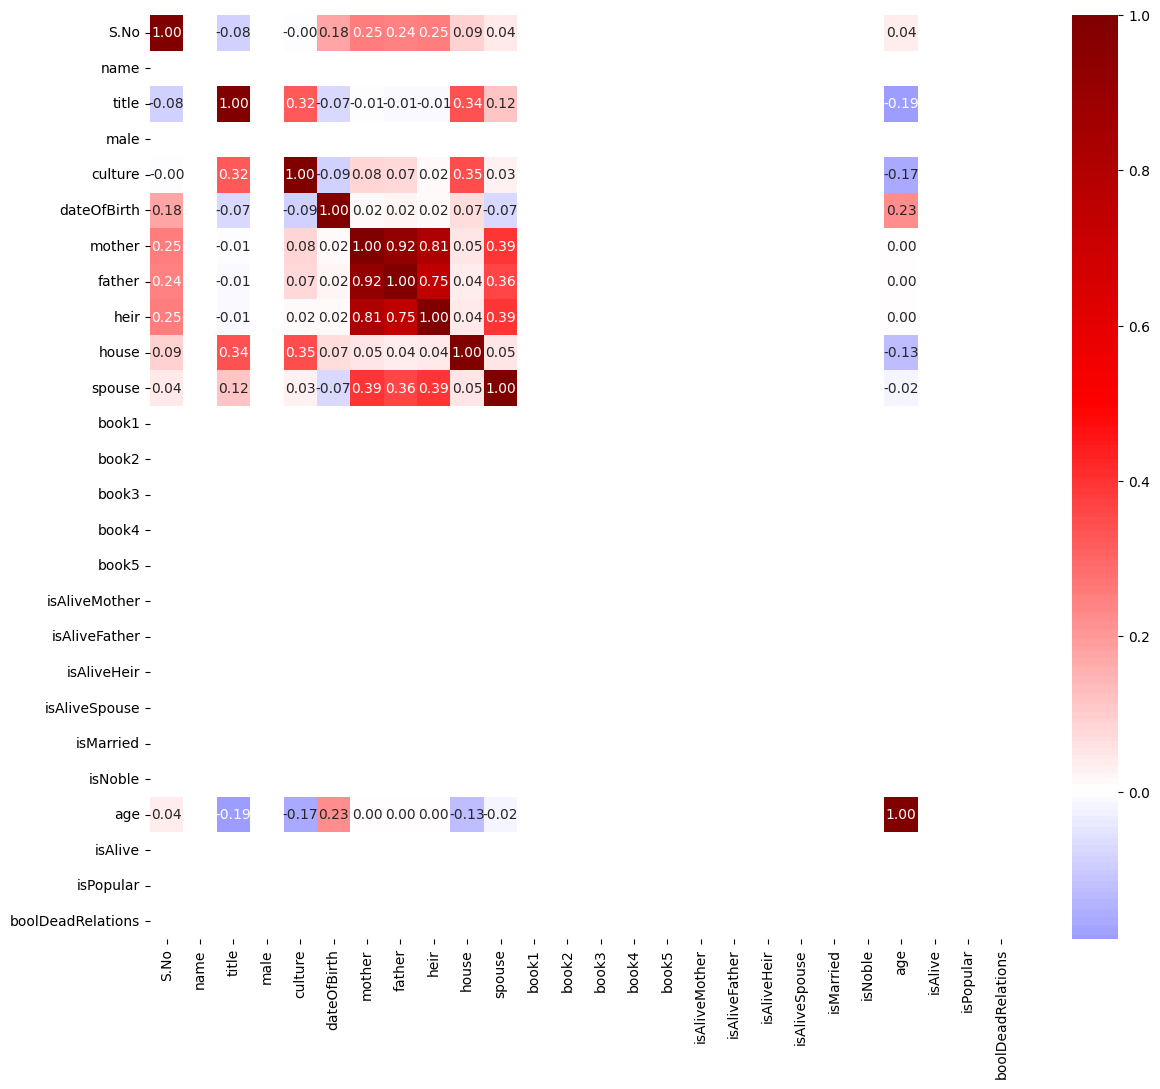

In [29]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, cmap='seismic', fmt='.2f', center=0)

Есть корреляция между знатностью и титулом (ожидаемо)

boolDeadRelations vs popularity (0.55) - у популярных людей больше умерших родственников

title vs house (0.34) - знатность и принадлежность к дому связаны
isAlive vs title (0.38) - влияние знатности на выживание

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

Наибольшее влияние имеют title, culture, house и book4

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [30]:
X = data.drop(columns=['isAlive']).values
y = data.isAlive.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2)

Scale:

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression +
* RandomForestClassifier +
* AdaBoostClassifier +
* GaussianProcessClassifier +
* GaussianNB +
* KNeighborsClassifier +
* SVC +
* DecisionTreeClassifier +


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
logistic_regression = LogisticRegression(C=3)

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

### Random Forest

In [ ]:
rf_class = RandomForestClassifier(n_estimators=25, random_state=42)
rf_class.fit(X_train, y_train)


y_pred_rfc = rf_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Accuracy  : 0.8654
Precision : 0.8893
Recall    : 0.9353
F1-score  : 0.9118


In [ ]:
rf_class = RandomForestClassifier(random_state=42, n_jobs=-1)


param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(rf_class, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print( grid_search.best_params_)

best_rf_class = grid_search.best_estimator_


y_pred_rfc = best_rf_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy  : 0.8942
Precision : 0.8996
Recall    : 0.9655
F1-score  : 0.9314


### KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=37)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=37)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Accuracy  : 0.7949
Precision : 0.7917
Recall    : 0.9828
F1-score  : 0.8769


In [ ]:
k_val = [i for i in range(3, 100)]
accuracy_dict = {}
for k in k_val:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X, y)
  y_pred_knn = knn_model.predict(X_test)

  accuracy_dict[k] = accuracy_score(y_test, y_pred_knn)


k_max = max(accuracy_dict, key=accuracy_dict.get)
knn_model = KNeighborsClassifier(n_neighbors=k_max)
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)


print(f"Max k     : {k_max}")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Max k     : 26
Accuracy  : 0.8045
Precision : 0.8178
Recall    : 0.9483
F1-score  : 0.8782


### AdaBoostClassifier

In [ ]:
ada_boost_cl = AdaBoostClassifier(n_estimators=5000, learning_rate=0.05, random_state=42)
ada_boost_cl.fit(X_train, y_train)
y_pred_ada = ada_boost_cl.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Accuracy  : 0.8494
Precision : 0.8439
Recall    : 0.9784
F1-score  : 0.9062


### DecisionTreeClassifier

In [ ]:
tree_cl_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=10)
tree_cl_model.fit(X_train, y_train)
y_pred_tree = tree_cl_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Accuracy  : 0.8301
Precision : 0.8745
Recall    : 0.9009
F1-score  : 0.8875


param grid

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

tree_cl = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(tree_cl, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


print(grid_search.best_params_)


best_tree_cl = grid_search.best_estimator_

accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy  : 0.8301
Precision : 0.8745
Recall    : 0.9009
F1-score  : 0.8875


### GaussianProcessClassifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gauss_pc_model = GaussianProcessClassifier(kernel=1.0 * RBF(2.0),random_state=0)
gauss_pc_model.fit(X_train, y_train)
y_pred_gpc = gauss_pc_model.predict(X_test)

print(classification_report(y_test, y_pred_gpc))

              precision    recall  f1-score   support

       False       0.88      0.53      0.66        80
        True       0.86      0.97      0.91       232

    accuracy                           0.86       312
   macro avg       0.87      0.75      0.78       312
weighted avg       0.86      0.86      0.85       312



### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss_nb_model = GaussianNB()
gauss_nb_model.fit(X_train, y_train)
y_pred_gnb = gauss_nb_model.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

       False       0.80      0.49      0.60        80
        True       0.84      0.96      0.90       232

    accuracy                           0.84       312
   macro avg       0.82      0.72      0.75       312
weighted avg       0.83      0.84      0.82       312

              precision    recall  f1-score   support

       False       0.80      0.49      0.60        80
        True       0.84      0.96      0.90       232

    accuracy                           0.84       312
   macro avg       0.82      0.72      0.75       312
weighted avg       0.83      0.84      0.82       312



### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

       False       0.86      0.46      0.60        80
        True       0.84      0.97      0.90       232

    accuracy                           0.84       312
   macro avg       0.85      0.72      0.75       312
weighted avg       0.85      0.84      0.83       312



## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [35]:
y_pred = logistic_regression.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])


print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"ROC AUC   : {roc_auc:.4f}")

NameError: name 'logistic_regression' is not defined

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

-> false positives > false negatives

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.16MB/s]


In [ ]:
from sklearn.model_selection import cross_val_score

rf_class = RandomForestClassifier(criterion='entropy', max_depth = 20, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
rf_class.fit(X, y)


y_final = rf_class.predict(X_test)
cross_val_score(rf_class, X, y, cv=5, scoring='accuracy').mean()


0.8323831313381153

### Test

In [ ]:
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
test_data.shape

(389, 24)

In [ ]:
test_data.dtypes

,0
name,object
title,object
male,int64
culture,object
dateOfBirth,float64
mother,object
father,object
heir,object
house,object
spouse,object


In [ ]:
test_data['age'].fillna(test_data['age'].median(), inplace=True)

test_data.loc[:, test_data.dtypes == 'float'] = test_data.loc[:, test_data.dtypes == 'float'].fillna(0)
test_data.loc[:, test_data.dtypes == 'object'] = test_data.loc[:, test_data.dtypes == 'object'].fillna('Unknown')

test_data['isPopular'] = test_data.popularity > 0.5
test_data['boolDeadRelations'] = test_data.numDeadRelations > 0
test_data.drop(columns=['popularity', 'numDeadRelations'], inplace=True)

test_data.drop(columns=['isAliveMother', 'isAliveSpouse', 'isAliveFather', 'isAliveHeir', 'name', 'mother','father', 'heir', 'spouse','dateOfBirth'], inplace = True)

test_data['culture'] = test_data['culture'].apply(simplify_culture)




test_data[categorical_cols] = encoder.fit_transform(data[categorical_cols], data['isAlive'])

test_data = scaler.transform(test_data)

test_data.sample(10)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)